<a href="https://colab.research.google.com/github/Yuriferr/Desafio-Inaugural-PosTech/blob/main/Desafio_Inaugural_Yuri_Fernandes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FIAP - Pós Tech IA para Devs
## Desafio Aula Inagural : Previsão de evasão escolar
### Professora: Poliana Ferreira
Atividade prática de classificação, cujo objetivo é desenvolver um modelo capazes de identificar se um aluno tem maior chance de abandonar os estudos (Dropout) ou de se formar (Graduate). Você deve ter acurácia >= 90% e recall do dropout >=e 80%

Vocês devem seguir os passos nos comentários desse notebook. Lembrem-se, vocês podem adicionar coisas, mas não podem tirar! :)

Base de dados: https://github.com/pnferreira/fiap-ia-devs/blob/main/dropout-inaugural.csv

Target: "Dropout" ou "Graduate"


In [95]:
# importar as bibliotecas necessárias - pandas, sklearn, matplotlib, seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score

In [96]:
# importar a base de dados
url = "https://github.com/pnferreira/fiap-ia-devs/blob/main/dropout-inaugural.csv?raw=true"
df = pd.read_csv(url)

In [97]:
# visualizar as primeiras linhas da base de dados
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1.0,8,5,2.0,1,1,1,13.0,10.0,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1.0,6,1,11.0,1,1,1,1.0,3.0,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1.0,1,5,5.0,1,1,1,22.0,27.0,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1.0,8,2,15.0,1,1,1,23.0,27.0,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2.0,12,1,3.0,0,1,1,22.0,28.0,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [98]:
# visualizar as informações da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3635 entries, 0 to 3634
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   float64
 1   Application mode                                3635 non-null   int64  
 2   Application order                               3635 non-null   int64  
 3   Course                                          3629 non-null   float64
 4   Daytime/evening attendance                      3635 non-null   int64  
 5   Previous qualification                          3635 non-null   int64  
 6   Nacionality                                     3635 non-null   int64  
 7   Mother's qualification                          3632 non-null   float64
 8   Father's qualification                          3628 non-null   float64
 9   Mother's occupation                      

In [99]:
# ver os valores da coluna Target - que queremos prever
df['Target'].value_counts()

,count
Target,
Graduate,2212
Dropout,1423


In [100]:
# tratar dados nulos
# tratar dados duplicados
# outras formas de pré-processamento (OPCIONAL - ex.: seleção de características, normalização, tratamento de outliers, balanceamento do target...)
# pode ser nessa célula ou nas seguintes, a depender do que você escolher fazer

df = df.dropna()
df = df.drop_duplicates()

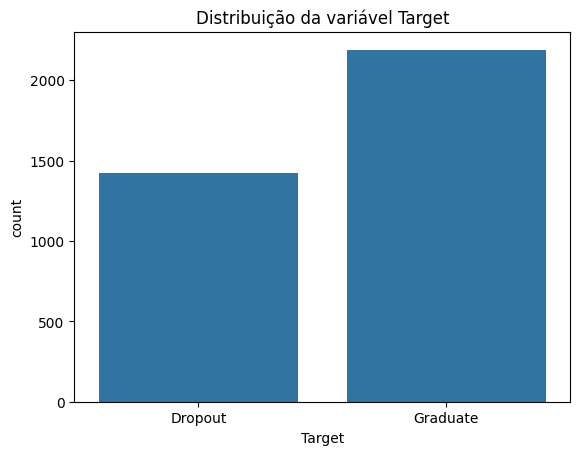

In [101]:
# análise exploratória: crie uma pergunta sobre a base de dados e responda através de um gráfico
# Pergunta: Qual a distribuição da variável Target?

if 'Target' in df.columns:
    sns.countplot(x='Target', data=df)
    plt.title('Distribuição da variável Target')
    plt.show()
else:
    print("A coluna 'Target' não foi encontrada após o pré-processamento.")

In [102]:
# divisão entre características (X) e rótulo (y)
# divisão entre treino e teste - 70% e 30%

if 'Target' in df.columns:
    X = df.drop('Target', axis=1)
    y = df['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
else:
    print("A coluna 'Target' não existe, impossível dividir os dados.")

In [103]:
# treinamento de modelo de classificação a sua escolha (um ou mais)

if 'Target' in df.columns:
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
else:
    print("A coluna 'Target' não existe, impossível treinar o modelo.")

In [104]:
# avaliação do modelo com dados de teste
# (para ser considerado resultado satisfatório, você deve alcançar no mínimo 90% de acurácia e 80% de recall do Dropout)

if 'Target' in df.columns:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label='Dropout')

    print(f"Acurácia: {accuracy:.2f}")
    print(f"Recall (Dropout): {recall:.2f}")

    if accuracy >= 0.90 and recall >= 0.80:
        print("Modelo atingiu os requisitos de acurácia e recall.")
    else:
        print("Modelo não atingiu os requisitos.")
else:
    print("A coluna 'Target' não existe, impossível avaliar o modelo.")

Acurácia: 0.90
Recall (Dropout): 0.81
Modelo não atingiu os requisitos.
